In [12]:
import matplotlib.pyplot as plt

import Framework.Confounder_Injection as CI
import Framework.Models as Models
import importlib
importlib.reload(Models)
importlib.reload(CI)
import torch
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

# Validation with br_net data

The synthetic data closely resembles real world data. Information of classes does overlap (classes share the same space on the picture). Since confounder and real features do not overlap it might be easier to learn the confounders compared to the real world.

modes:
1. br_net
2. black_n_white

model:
1. NeuralNetwork(inputsize)
2. LeNet_5
3. Br_Net

## SimpleConv model

In [13]:
params = [
    [[1, 4], [3, 6]], # real feature
    [[10, 12], [20, 22]] # confounder
    ]

With the test_network class it's easy to test new combinations parameters

### No confounder

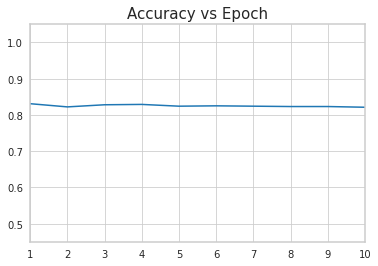

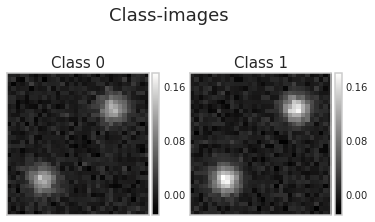

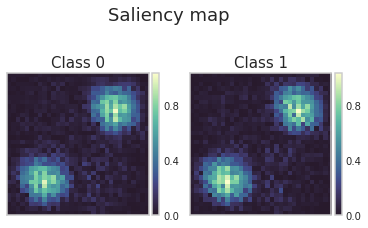

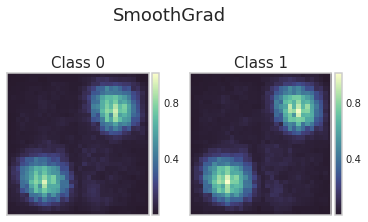

In [14]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=0, test_confounding=[0], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, class_images=True, saliency=True, smoothgrad=True)

### Train- and testset confounded

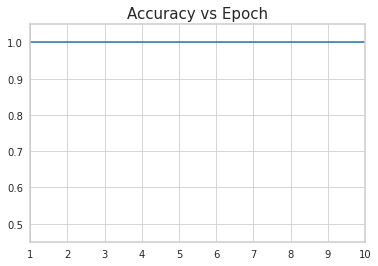

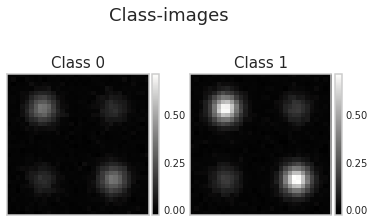

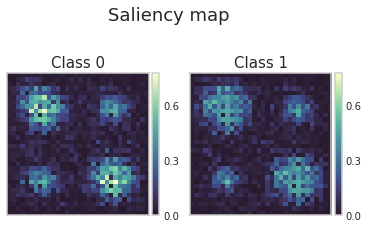

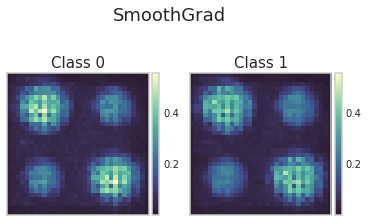

In [15]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[1], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True, class_images=True, saliency=True, smoothgrad=True)

### Trainset confounded, testset 50% confounding

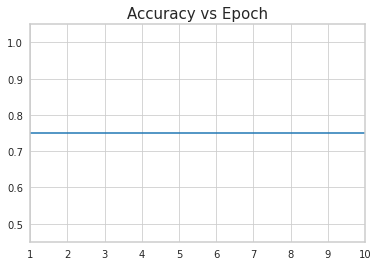

In [16]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0.5], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Trainset confounded, testset unconfounded

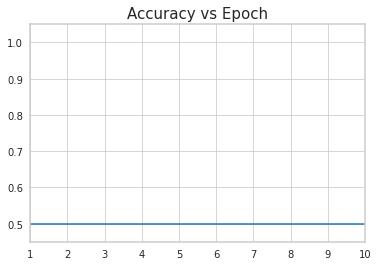

In [17]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=[0], params=params)
c.train(model=model, epochs=10, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_epoch=True)

### Accuracy vs. confounding strength in testset

For 5 epochs

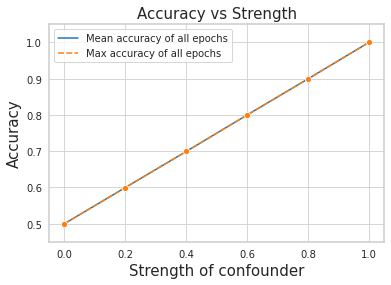

In [18]:
c = CI.confounder(debug=False)
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

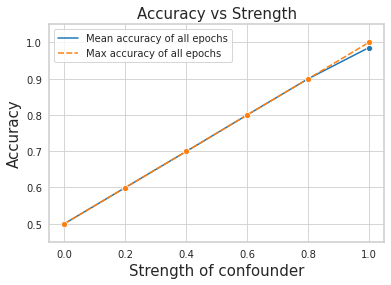

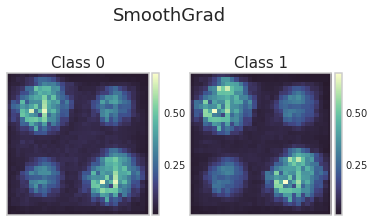

In [19]:
c = CI.confounder()
model = Models.SimpleConv()
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True)

## NeuralNetwork model

### Accuracy vs. confounding strength in testset

For 5 epochs

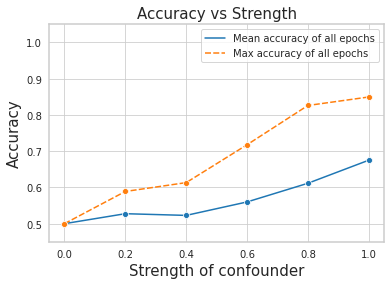

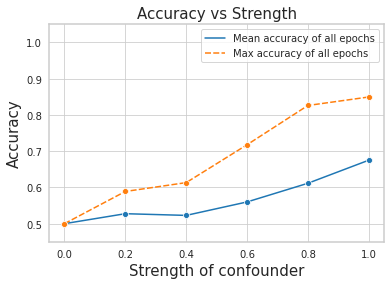

In [20]:
c = CI.confounder()
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=5, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True)

For 20 epochs

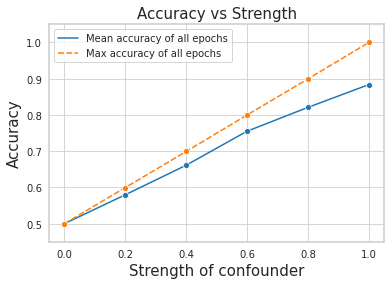

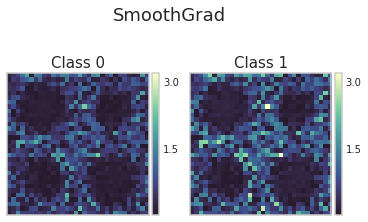

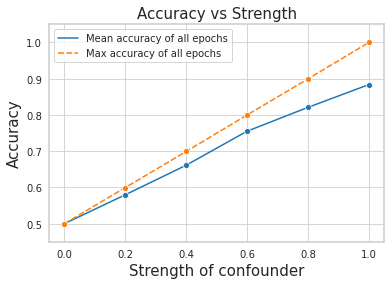

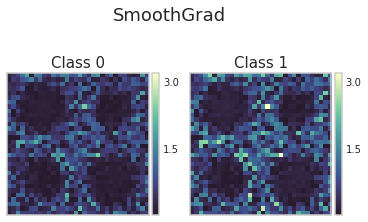

In [21]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br-net", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True)

# Validation with br_net_simple data

In the br_net_simple dataset the different classes do not overlap but rather have distinct places in the picture. This dataset is probably not representative for real world problems since normally the information in images for different classes does overlap. It seems that the separation leads to the learning of the real feature despite the presence of a confounder. Intuitively the network does not need to learn the confounder to achieve higher accuracy because, in contrast to the br_net case, it does not need the additional information. It can be seen in the SmoohGrad image that the network uses both effects (real + confounding) approximately to the same degree.

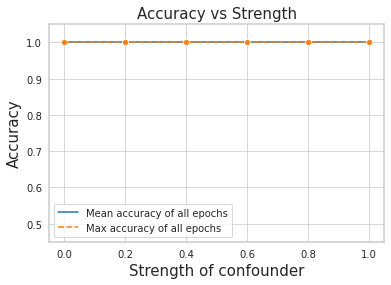

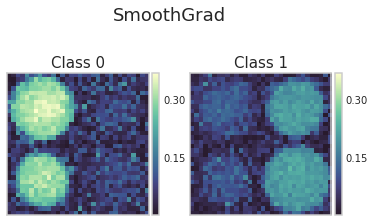

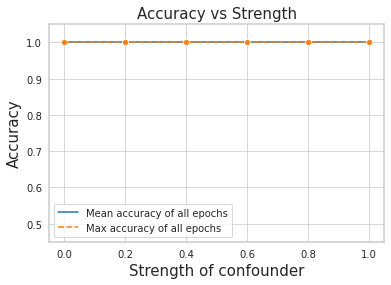

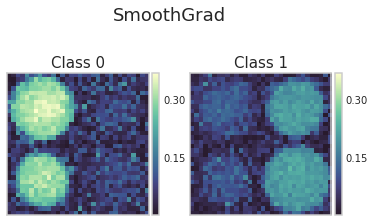

In [22]:
c = CI.confounder(seed=42)
model = Models.NeuralNetwork(32*32)
c.generate_data(mode="br_net_simple", samples=512, train_confounding=1, test_confounding=np.arange(0, 1.01, 0.2), params=params)
c.train(model=model, epochs=20, batch_size=64, optimizer=torch.optim.Adam, hyper_params={'lr':0.001})
c.plot(accuracy_vs_strength=True, smoothgrad=True)